In [2]:
import matplotlib.pyplot as plt
import numpy as np
from utils import compute_contraction_noise, compute_continuity_noise, compute_score_bounds
from scipy.stats import norm
from agent_distribution import AgentDistribution

In [3]:
agent_dist_10000 = AgentDistribution(n=10000, d=2, n_types=1, types={"etas": np.array([6., 6.]).reshape(1, 2, 1),
                                                   "gammas": np.array([0.2, 0.5]).reshape(1, 2, 1)
                                                  })

agent_dist_1000 = AgentDistribution(n=1000, d=2, n_types=1, types={"etas": np.array([6., 6.]).reshape(1, 2, 1),
                                                   "gammas": np.array([0.2, 0.5]).reshape(1, 2, 1)
                                                  })

agent_dist_100 = AgentDistribution(n=100, d=2, n_types=1, types={"etas": np.array([6., 6.]).reshape(1, 2, 1),
                                                   "gammas": np.array([0.2, 0.5]).reshape(1, 2, 1)
                                                  })

Text(0, 0.5, 'Quantile Mapping $q(P_{\\beta, s})$')

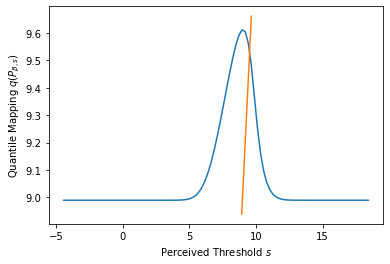

In [4]:
beta = np.array([0.701, 0.701]).reshape(2, 1)
sigma = compute_contraction_noise(agent_dist_100)
q = 0.7

bounds = compute_score_bounds(beta, sigma)
thresholds = np.linspace(bounds[0], bounds[1], 100)
qs = [agent_dist_100.quantile_mapping_true_distribution(beta, s, sigma, q) for s in thresholds]

plt.plot(thresholds, qs)
line = np.linspace(min(qs) - 0.05, max(qs) + 0.05, 50)
plt.plot(line, line)
plt.xlabel("Perceived Threshold " +r"$s$")
plt.ylabel("Quantile Mapping " + r"$q(P_{\beta, s})$")

In [5]:
fp = agent_dist_100.quantile_fixed_point_true_distribution(beta, sigma, q)

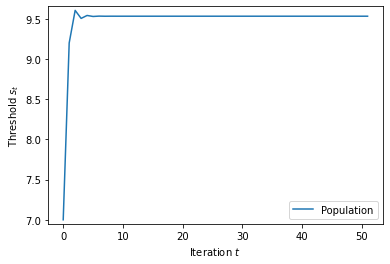

In [6]:
true_st = agent_dist_100.quantile_fixed_point_iteration_true_distribution(beta, sigma, q, maxiter=51, s0=7., plot=True)

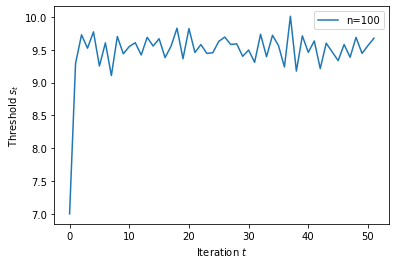

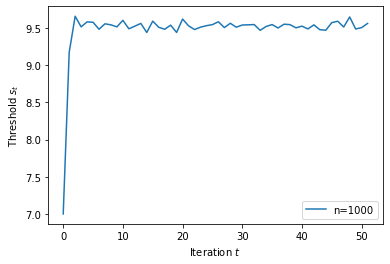

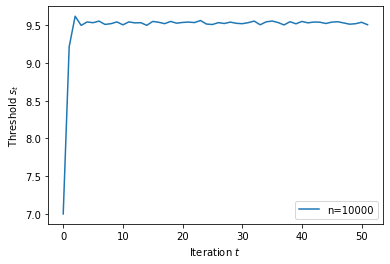

In [7]:
st_100 = agent_dist_100.quantile_fixed_point_iteration(beta, sigma, q, maxiter=51, s0=7., plot=True)
st_1000 = agent_dist_1000.quantile_fixed_point_iteration(beta, sigma, q, maxiter=51, s0=7., plot=True)
st_10000 = agent_dist_10000.quantile_fixed_point_iteration(beta, sigma, q, maxiter=51, s0=7., plot=True)

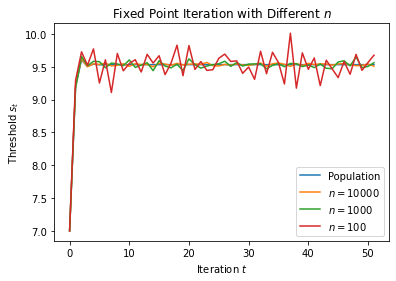

In [8]:
plt.plot(list(range(len(true_st))), true_st, label="Population")
plt.plot(list(range(len(true_st))), st_10000, label=r"$n=10000$")
plt.plot(list(range(len(true_st))), st_1000, label=r"$n=1000$")
plt.plot(list(range(len(true_st))), st_100, label=r"$n=100$")
plt.legend()
plt.xlabel("Iteration " + r"$t$")
plt.ylabel("Threshold " + r"$s_t$")
plt.title("Fixed Point Iteration with Different " + r"$n$")
plt.savefig("figs/single_type_fpi.pdf")

In [9]:
def compute_scale_threshold_dist(sigma, q, n):
    q_G = norm.ppf(q, loc=0., scale=sigma)
    scale = np.sqrt(q * (1-q)/((norm.pdf(q_G, loc=0., scale=sigma) ** 2)))
    return scale

In [10]:
s0 = 7.
q= q
dist = agent_dist_10000


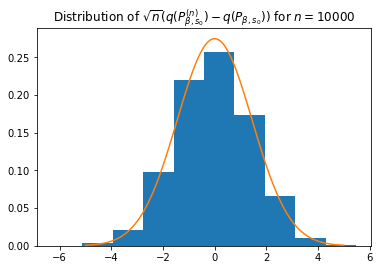

In [11]:
s1_true = dist.quantile_mapping_true_distribution(beta, s=s0, sigma=sigma, q=q)

l = []
for i in range(10000):
    s1_hat= dist.quantile_best_response(beta, s=s0, sigma=sigma, q=q) 
    diff = (s1_hat - s1_true) * np.sqrt(dist.n)
    l.append(diff)

plt.hist(l, density=True)
xs = np.linspace(-5., 5., 100)
scale= compute_scale_threshold_dist(sigma, q, dist.n)
plt.plot(xs, norm.pdf(xs, loc=0., scale=scale))
plt.title("Distribution of " + r"$\sqrt{n}(q(P_{\beta, s_{0}}^{(n)}) - q(P_{\beta, s_0}))$" + " for " + r"$n={}$".format(dist.n))
plt.savefig("figs/single_type_dist_{}_threshold.pdf".format(dist.n))